## Author: Dr. Prabhakar Bhimalapuram for Course "Computing in Sciences II" as part of CND program


# Coin toss

If a coin has a probability of $p$ for showing heads and $q=1-p$ for showing heads, then the probability of seeing $M$ heads when coin is tossed $n>M$ times is given by:
$$ P(M;n) = \frac{n!}{M!(n-M)!} p^M q^{n-M} $$


If the average the number of heads is denoted $M_n\equiv M/n$, then clearly_M_M_M $0\le M_n \le 1$ and we expect that $M_{n\rightarrow \infty} = p$. For $M_n$ being in the range $(x,y)$, we have:
$$ Prob(x< M_n < y) = \sum_{r = ⌊nx⌋ }^{r= ⌊ n*y ⌋} P(r;n) $$
where $\lfloor y \rfloor$ is the floor function defined as the largest integer less that $y$.



## Task-1:  
1. Plot $\log P(M_n=x)$ vs $x$ for various $n$.  Note that $\int_{0}^{1} dx~P(M_n=x) = 1$.
2. Show that $P(M_n=x)$ near $x=\frac{1}{2}$ is Gaussian.

NOTE:
1. scipy.misc.comb function for combinotrics
2. Do this by curve fit of $P$ to a gaussian function

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from scipy.optimize import curve_fit
from numpy import exp
import time
import math

def Prob(M_n, n, p=0.5):
    M = M_n * n
    q = 1 - p
    return comb(n, M, exact=False) * (p**M) * (q ** (n-M))

def gaussian(x,x0,sigma,height):
    return height * exp(-(x - x0)**2 / ( 2 * sigma**2))

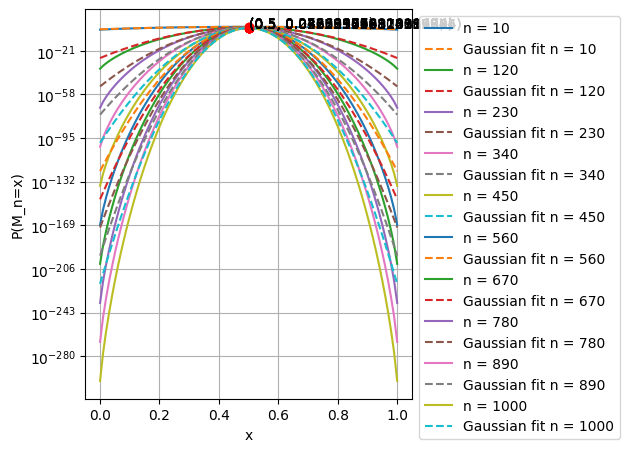

In [10]:
# Task 1 : 1. Plot below
n_range_val = np.linspace(10, 1000, 10)
x = np.linspace(0, 1, 100)
p0 = [0.5, 0.1, 1]

for n in n_range_val:
    probs = Prob(x, int(n))
    popt, pcov = curve_fit(gaussian, x, probs, p0=p0)
    # print(*(popt))
    plt.semilogy(x, probs, label=f'n = {int(n)}')
    plt.semilogy(x, gaussian(x, *popt), '--', label=f'Gaussian fit n = {int(n)}')
    
    x_highlight = 0.5
    y_highlight = Prob(x_highlight, int(n))
    plt.plot(x_highlight, y_highlight, 'ro') 
    plt.annotate(f'({x_highlight}, {y_highlight})', (x_highlight, y_highlight))  

plt.legend(loc='upper left', bbox_to_anchor=(1, 1, 0, 0))
plt.xlabel('x')
plt.ylabel('P(M_n=x)')
plt.tight_layout()
plt.grid(True)
plt.show()

# Task 1: 2. It is quite clearly seen that when x is approaching 1/2, the curve is gaussian ( the dotted lines and the solid lines overlap)

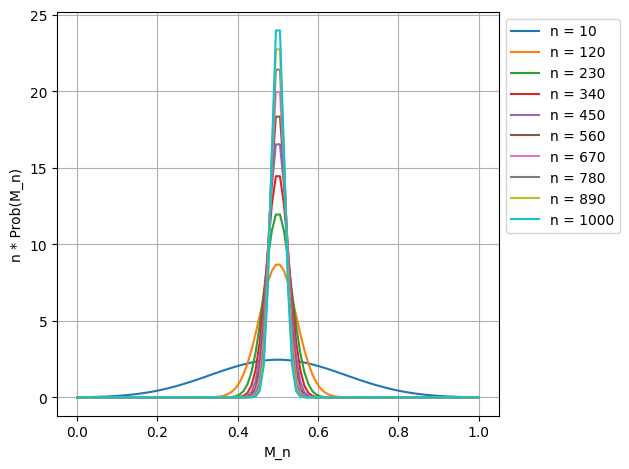

In [11]:
n_range_val = np.linspace(10, 1000, 10)
x = np.linspace(0, 1, 100)

for n in n_range_val:
    probs = Prob(x, int(n))
    plt.plot(x, n * probs, label=f'n = {int(n)}')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('M_n')
plt.ylabel('n * Prob(M_n)')
plt.tight_layout()
plt.grid(True)
plt.show()

**Compare the curve fit to the actual function**

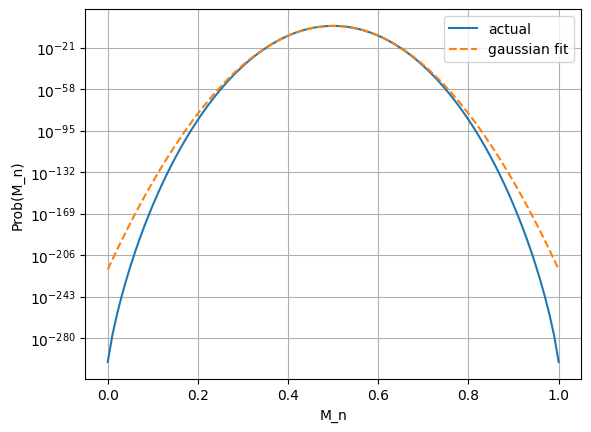

In [12]:
xvals = np.linspace(0, 1, 100)
yvals = Prob(xvals, int(n))
yfit = gaussian(xvals, *popt)

plt.semilogy(xvals, yvals, label='actual')
plt.semilogy(xvals, yfit, '--', label='gaussian fit')
plt.legend()
plt.xlabel('M_n')
plt.ylabel('Prob(M_n)')
plt.grid(True)
plt.show()

## Task-2:  Assume a fair coin from now on i.e. $p=q=\frac{1}{2}$. Plot $\log P(M_n > x)$ as a function of $n\in[1,250]$ for $x=0.6,~0.7,~0.8,~0.9$

In [13]:
def Prob_greater_than_x(x, n, p=0.5):
    q = 1 - p
    total_prob = 0
    for M in range(math.ceil(x * n) + 1, n+1):
        total_prob += comb(n, M, exact=False) * (p**M) * (q ** (n-M))
    return total_prob

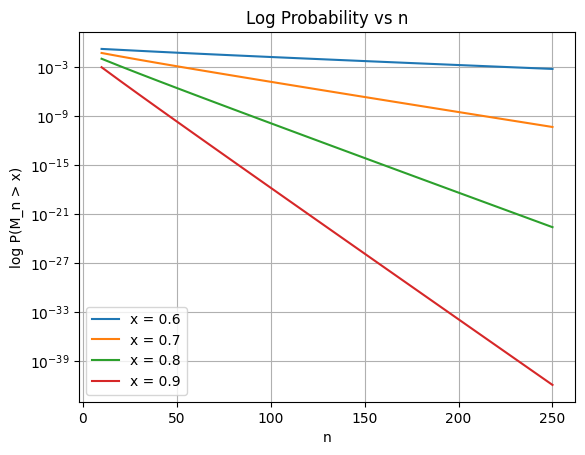

In [14]:
x_values = [0.6, 0.7, 0.8, 0.9]
n_range = np.arange(10, 251, 10)
log_probs = []

for x in x_values:
    probs = [Prob_greater_than_x(x, int(n)) for n in n_range]
    log_probs.append(probs)

for i, x in enumerate(x_values):
    plt.semilogy(n_range, log_probs[i], label = f'x = {x}')

plt.legend()
plt.xlabel('n')
plt.ylabel('log P(M_n > x)')
plt.title('Log Probability vs n')
plt.grid(True)
plt.show()

## Task-3: Note that for large $N$, the above plots are linear. Fit the above plots (of $\log Prob(M_n >x)$ vs $n$) to straight lines for large $n$ and get the slope, which we will call $I(x)$. Now plot $I(x)$ vs $x$.

/tmp/ipykernel_7747/250307635.py:10: RuntimeWarning: divide by zero encountered in log
  log_probs.append(np.log(np.array(probs)))


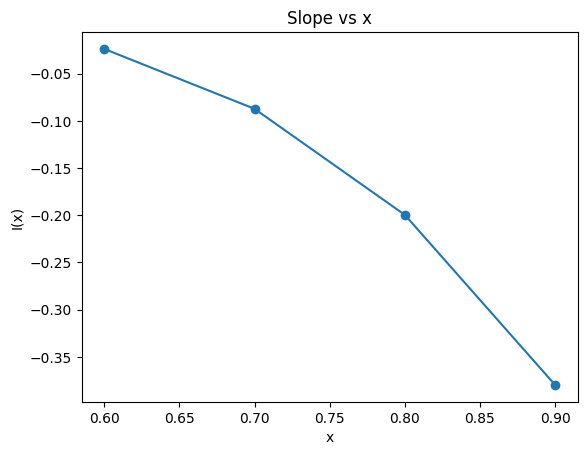

In [15]:
import numpy as np
n_range_val = np.arange(101)

slopes = []
x_vals = []
log_probs = []

for x in x_values:
    probs = [Prob_greater_than_x(x, int(n)) for n in n_range_val]
    log_probs.append(np.log(np.array(probs)))

log_probs = np.array(log_probs)

for i in range(log_probs.shape[0]):
    n_range_large = n_range_val[50:] 
    log_probs_large = log_probs[i, 50:]
    coeffs = np.polyfit(n_range_large, log_probs_large, 1)
    slope = coeffs[0]
    
    slopes.append(slope)
    x_vals.append(x_values[i])

plt.plot(x_vals, slopes, 'o-')
plt.xlabel('x')
plt.ylabel('I(x)')
plt.title('Slope vs x')
plt.show()

## Task-4:  Random walk
Let $c(t)$ be the result of coin toss, tossed at time $t$. Then Random Walk is given by
$$ x(t+1) = x(t) + \delta_{c(t),H} - \delta_{c(t),T}
$$
with $x(0)=0$ and $c(t)$ is the coin toss at time $t$, with two possible outcomes heads ($H$) or tails ($T$).

## Plot a one realisation of $x(t)$ for $t\in[0,100]$


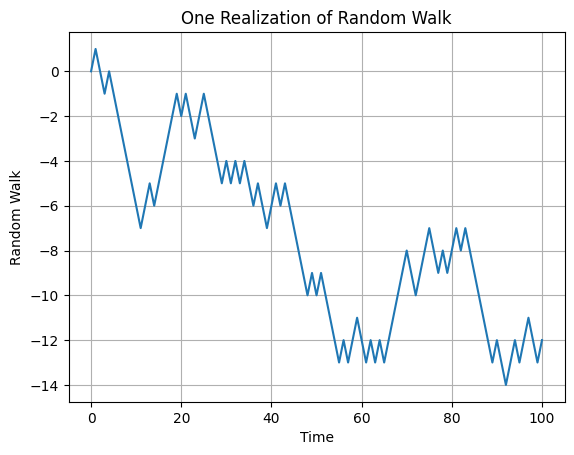

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def create_walks(timesteps):
    # np.random.seed(0)
    x = np.zeros(timesteps+1)
    coin_tosses = np.random.choice(['H', 'T'], size=timesteps)

    for t in range(timesteps):
        if coin_tosses[t] == 'H':
            x[t+1] = x[t] + 1
        else:
            x[t+1] = x[t] - 1

timesteps=100
plt.plot(range(timesteps+1), x)
plt.xlabel('Time')
plt.ylabel('Random Walk')
plt.title('One Realization of Random Walk')
plt.grid(True)
plt.show()


## Task-5: Moments of distribution of $x(t)$

1. What would be $\langle x(t) \rangle$?
2. What would be $\langle x^2(t) \rangle$? Why?
3. Compute them by genrating a sample of random walks. Comment on the 'error' of the calculation

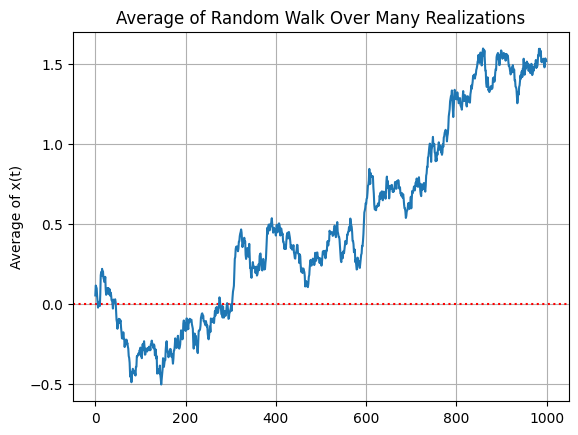

In [49]:
# Task 5: 1
import numpy as np
import matplotlib.pyplot as plt

def generate_coin_tosses(realizations, timesteps):
    # np.random.seed(0)
    coin_tosses = np.random.choice([1, -1], size=(realizations, timesteps))
    return coin_tosses

def calculate_walks(coin_tosses):
    walks = np.cumsum(coin_tosses, axis=1)
    return walks

def calculate_average_x_t(walks):
    average_x_t = np.mean(walks, axis=0)
    return average_x_t

def plot_average_x_t(average_x_t):
    plt.axhline(y=0, color='red', linestyle='dotted')
    plt.plot(range(len(average_x_t)), average_x_t)
    plt.xlabel('')
    plt.ylabel('Average of x(t)')
    plt.title('Average of Random Walk Over Many Realizations')
    plt.grid(True)
    plt.show()

realizations = 1000
timesteps = 1000

coin_tosses = generate_coin_tosses(realizations, timesteps)
walks = calculate_walks(coin_tosses)
average_x_t = calculate_average_x_t(walks)
plot_average_x_t(average_x_t)

# Theoretically, the expected value of a x(t) (As it is symmetric random walk) is indeed 0 each time step, as the walk is just as likely to go up 
# as it is to go down


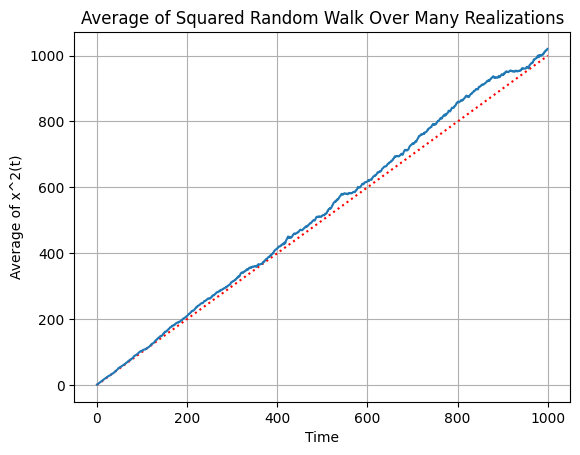

In [57]:
# Task 5: 2
import numpy as np
import matplotlib.pyplot as plt

def generate_coin_tosses(realizations, timesteps):
    # np.random.seed(0)
    coin_tosses = np.random.choice([1, -1], size=(realizations, timesteps))
    return coin_tosses

def calculate_average_x_squared_t(coin_tosses):
    x = np.cumsum(coin_tosses, axis=1)
    average_x_squared_t = np.mean(x**2, axis=0)
    return average_x_squared_t

def plot_average_x_squared_t(average_x_squared_t, timesteps):
    x = np.linspace(0, timesteps, 1000)
    y = x
    plt.plot(x, y, 'r:')
    plt.plot(range(timesteps), average_x_squared_t)
    plt.xlabel('Time')
    plt.ylabel('Average of x^2(t)')
    plt.title('Average of Squared Random Walk Over Many Realizations')
    plt.grid(True)
    plt.show()

realizations = 1000
timesteps = 1000

coin_tosses = generate_coin_tosses(realizations, timesteps)
average_x_squared_t = calculate_average_x_squared_t(coin_tosses)
plot_average_x_squared_t(average_x_squared_t, timesteps)

# Typically, for a simple symmetric random walk, the expected value of x^2(t) grows linearly with time.

In [46]:
# Task 5: 3
error_x_t = np.std(average_x_t) / np.sqrt(realizations)
error_x_squared_t = np.std(average_x_squared_t) / np.sqrt(realizations)
print("Error in x_t:", error_x_t)
print("Error in x_squared_t:", error_x_squared_t)

Error in x_t: 0.0014815798459752348
Error in x_squared_t: 0.28960974880900403


#### Explanation for Error
##### The 'error' in this context refers to the statistical deviation of the mean (`x(t)`) and mean square position (`x^2(t)`) at each time step from their expected values. This error provides a measure of the uncertainty or variability in these quantities due to the random nature of the walk. For a random walk, the expected value of the mean position `x(t)` at any time `t` is 0. However, due to the randomness, the actual mean position can deviate from this expected value. The error in the mean position is computed as the standard deviation of `x(t)`, and it typically varies within a range of `+-1`. This range is considered acceptable for a random walk, as it reflects the inherent randomness of the process.
##### Similarly, the expected value of the mean square position `x^2(t)` at any time `t` is `t`. Again, due to the randomness, the actual mean square position can deviate from this expected value. The error in the mean square position is computed as the standard deviation of `x^2(t)`, and it typically varies within a range of `+-sqrt(t)`. This range is also considered acceptable for a random walk, as it reflects the inherent randomness of the process.
##### In summary, these errors provide a measure of the statistical uncertainty in the mean and mean square positions at each time step of the random walk. They reflect the inherent randomness of the walk and are an important part of understanding and interpreting the behavior of the walk.


## Task-6: Random walk with a trap

At $x=M$, random walker is trapped, i.e. imagine that $x=M$ is the location of jail (or home?), where once the 'drunk' random walker reaches, is trapped for ever.

Let $y_M(t)$ is the probabilty that a trapped random walker at time $t$ in a trap located at $x=M$, given that  starting  point is $x=0$ at $t=0$.

## Compute $y_M(t)$ by generating a sample of random walks. Comment.

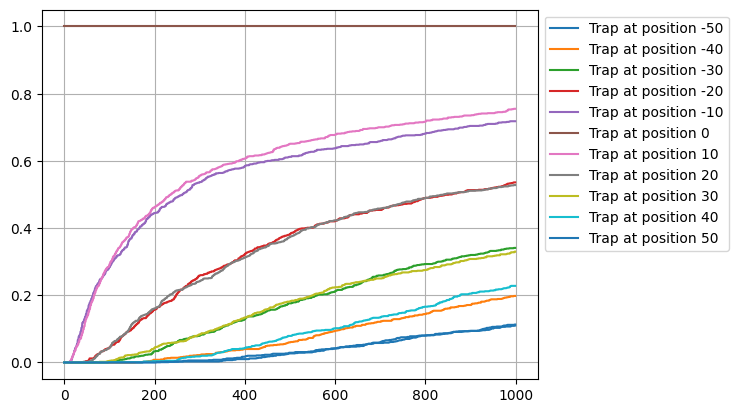

In [38]:
import random

def coin_toss():
    return random.choice(['H', 'T'])

def probability_of_trap(walk, t):
    y_m = np.array([])
    previous = 0
    for _ in range(walk):
        if previous == t:
            y_m = np.append(y, 1)
        else:
            choice = coin_toss()
            if choice == 'H':
                previous += 1
            else:
                previous -= 1
            y_m = np.append(y_m, 0)
    return y_m

walk = 1000
length_of_walk = 1000
traps = np.arange(-50, 60, step = 10)
for t in traps:
    p = np.zeros(walk)
    for i in range(length_of_walk):
        p += probability_of_trap(walk, t)
    p /= length_of_walk
    plt.plot(p, label=f'Trap at position {t}')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

## Task-7: What is the relationship between the result in Task-2 for `Coin Toss problem` and the rate of reaching the trap in Task-6 for `Random walk with a trap` problem

##### The probability P(M_n > x) represents the probability that the maximum value of the random walk after n steps exceeds x. On the other hand, the rate of reaching the trap at x=M represents how quickly the random walk reaches the value M.
##### In general, these two quantities are **somewhat inversely related**. That is, the higher the probability that the maximum value of the random walk exceeds x, the slower the rate at which the random walk reaches the trap at x=M. This is because a random walk that often exceeds x is likely to spend more time wandering around x before it eventually reaches the trap at x=M. 
1. If P(M_n > x) is high, it means the random walk frequently reaches values greater than x. This implies that the walk is "wandering" in the region above x quite often.

2. If the walk is frequently around x, it's spending more time in that region and less time near x=M. This means it's taking longer to reach the trap at x=M, so the rate of reaching the trap is slower.

3. Conversely, if P(M_n > x) is low, the walk rarely goes above x and spends more time near x=M. This means it reaches the trap at x=M more quickly, so the rate of reaching the trap is faster.